(sec-distr-rv-cont)=
# Distribuzioni di v.c. continue 

Dopo avere introdotto con una simulazione il concetto di funzione di densità nel Capitolo {ref}`sec-intro-density-function`, prendiamo ora in esame alcune delle densità di probabilità più note. La più importante di esse è sicuramente la distribuzione Normale.

## Distribuzione Gaussiana

Non c'è un'unica distribuzione gaussiana (o Normale): la distribuzione gaussiana è una famiglia di distribuzioni. Tali distribuzioni sono dette "gaussiane" in onore di Carl Friedrich Gauss (uno dei più grandi matematici della storia il quale, tra le altre cose, scoprì l'utilità di tale funzione di densità per descrivere gli errori di misurazione). Adolphe Quetelet, il padre delle scienze sociali quantitative, fu il primo ad applicare tale funzione di densità alle misurazioni dell'uomo. Karl Pearson usò per primo il termine "distribuzione normale" anche se ammise che questa espressione "ha lo svantaggio di indurre le persone a credere che le altre distribuzioni, in un senso o nell'altro, non siano normali."

### Limite delle distribuzioni binomiali

Iniziamo con un un breve excursus storico. Nel 1733, Abraham de Moivre notò che, aumentando il numero di prove di una distribuzione binomiale, la distribuzione risultante diventava quasi simmetrica e a forma campanulare. Con 10 prove e una probabilità di successo di 0.9, la distribuzione è chiaramente asimmetrica.

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import arviz as az

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
plt.style.use('tableau-colorblind10')

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


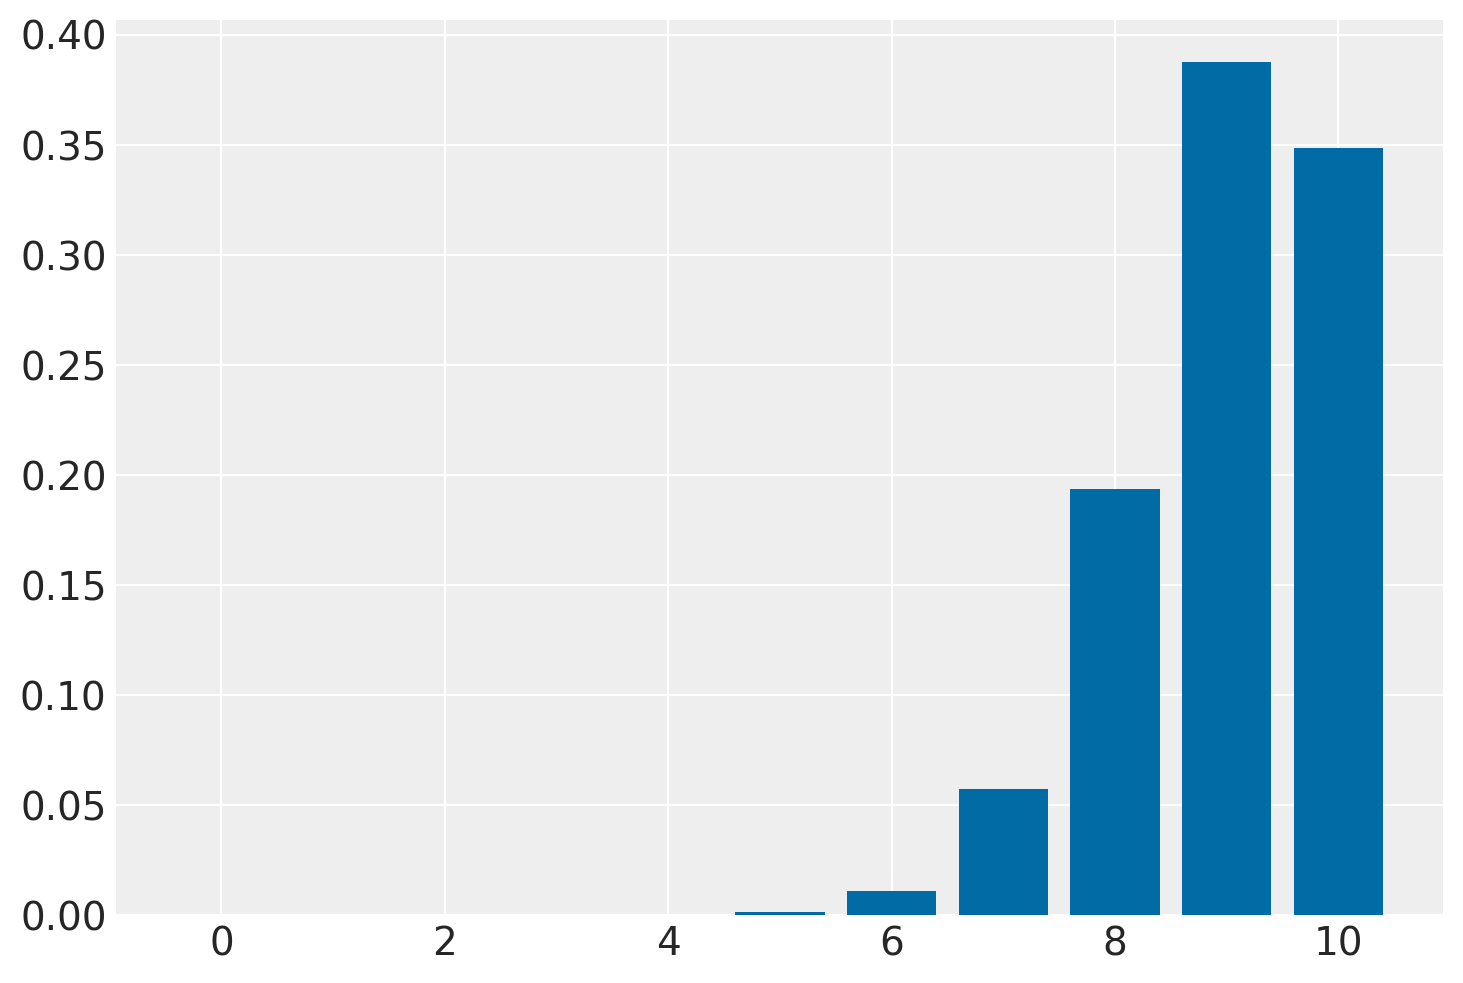

In [3]:
n = 10
p = 0.9
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [st.binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.bar(r_values, dist)
plt.show()

Ma se aumentiamo il numero di prove di un fattore di 100 a *N* = 1000, senza modificare la probabilità di successo di 0.9, la distribuzione assume una forma campanulare quasi simmetrica. Dunque, de Moivre scoprì che, quando *N* è grande, la funzione gaussiana (che introdurremo qui sotto), nonostante sia la densità di v.c. continue, fornisce una buona approssimazione alla funzione di massa di probabilità binomiale.

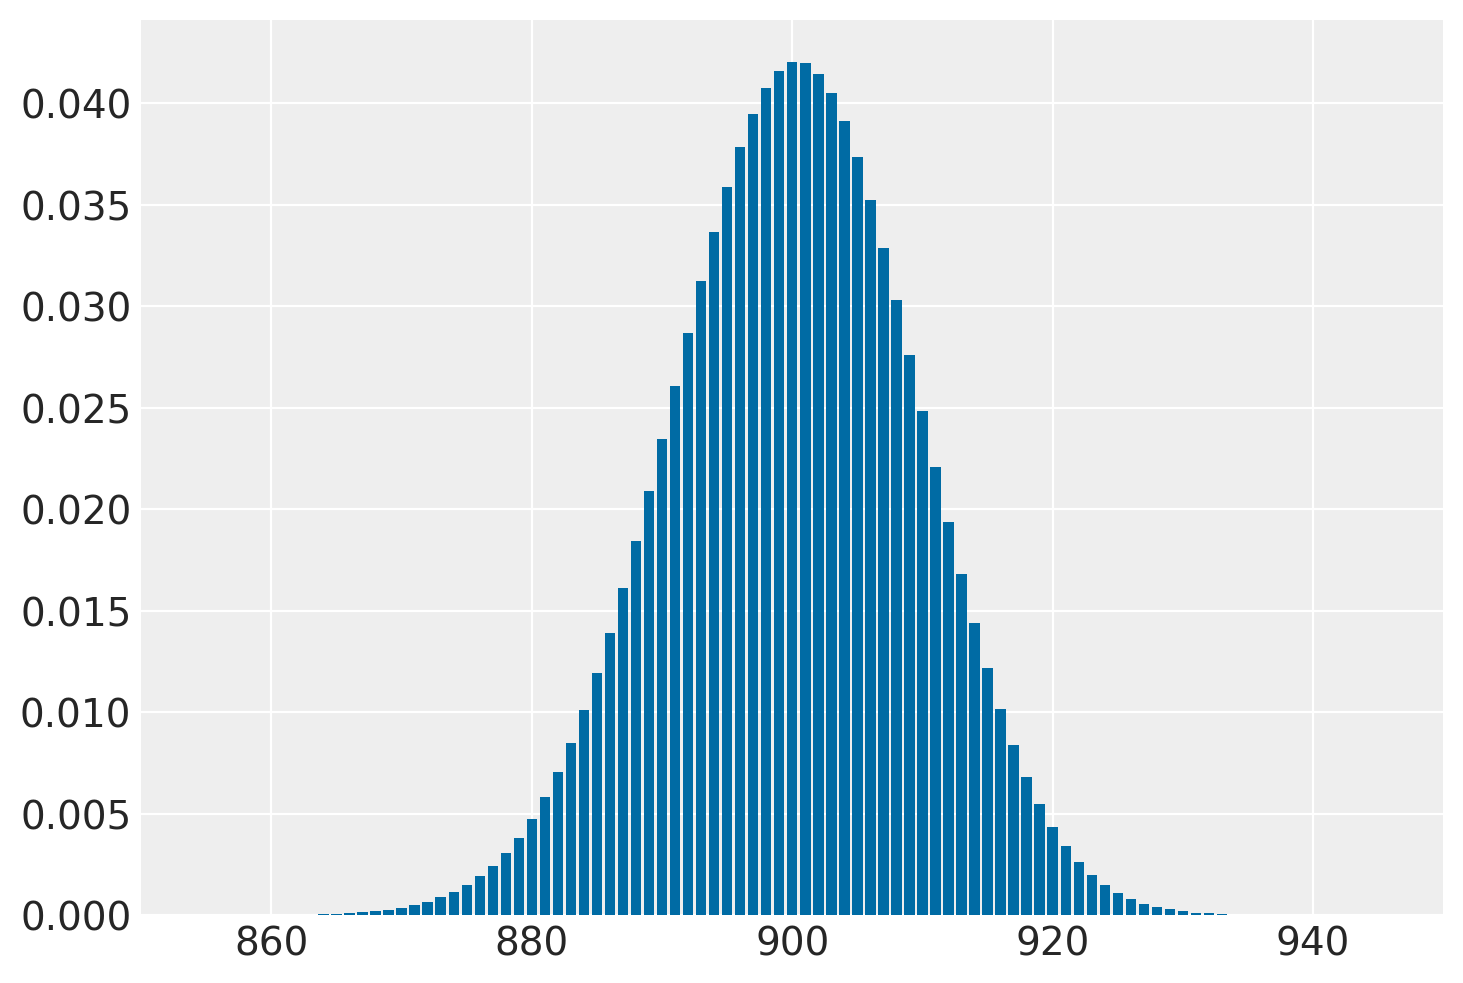

In [4]:
n = 1000
p = 0.9
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [st.binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.bar(r_values, dist)
plt.xlim(850, 950)
plt.show()

La distribuzione Normale fu scoperta da Gauss nel 1809. Il Paragrafo successivo illustra come si possa giungere alla Normale mediante una simulazione.

## La Normale prodotta con una simulazione

{cite}`McElreath_rethinking` illustra come sia possibile giungere alla distribuzione Normale mediante una simulazione. Supponiamo che vi siano mille persone tutte allineate su una linea di partenza. Quando viene dato un segnale, ciascuna persona lancia una moneta e fa un passo in avanti oppure all'indietro a seconda che sia uscita testa o croce. Supponiamo che la lunghezza di ciascun passo vari da 0 a 1 metro. Ciascuna persona lancia una moneta 16 volte e dunque compie 16 passi.

In [5]:
import random

def randomwalk(n):
    steps = []
    for i in range(n):
        rand = np.random.randint(1,3)
        if rand == 1:
            steps.append(-random.uniform(0,1))
        else:
            steps.append(random.uniform(0,1))
    walk = np.cumsum(steps)
    return walk


I valori di una singola passeggiata casuale, ad esempio, sono i seguenti.

In [6]:
particularWalk = randomwalk(16)
print(*particularWalk)

-0.28011867152846015 0.37114896699268995 -0.16022229557413348 0.3222997122968695 1.160162983114828 0.9156470475066333 0.9379677474980419 0.6998162118626947 0.11285636888157091 0.6960433614738856 -0.10278219501980235 -0.32471026917413504 -1.2659480781739774 -2.1611010722991884 -2.4725368287938148 -2.1090566488909843


Alla conclusione di queste passeggiate casuali (*random walk*) non possiamo sapere con esattezza dove si troverà ciascuna persona, ma possiamo conoscere con certezza le caratteristiche della distribuzione delle mille distanze dall'origine. 

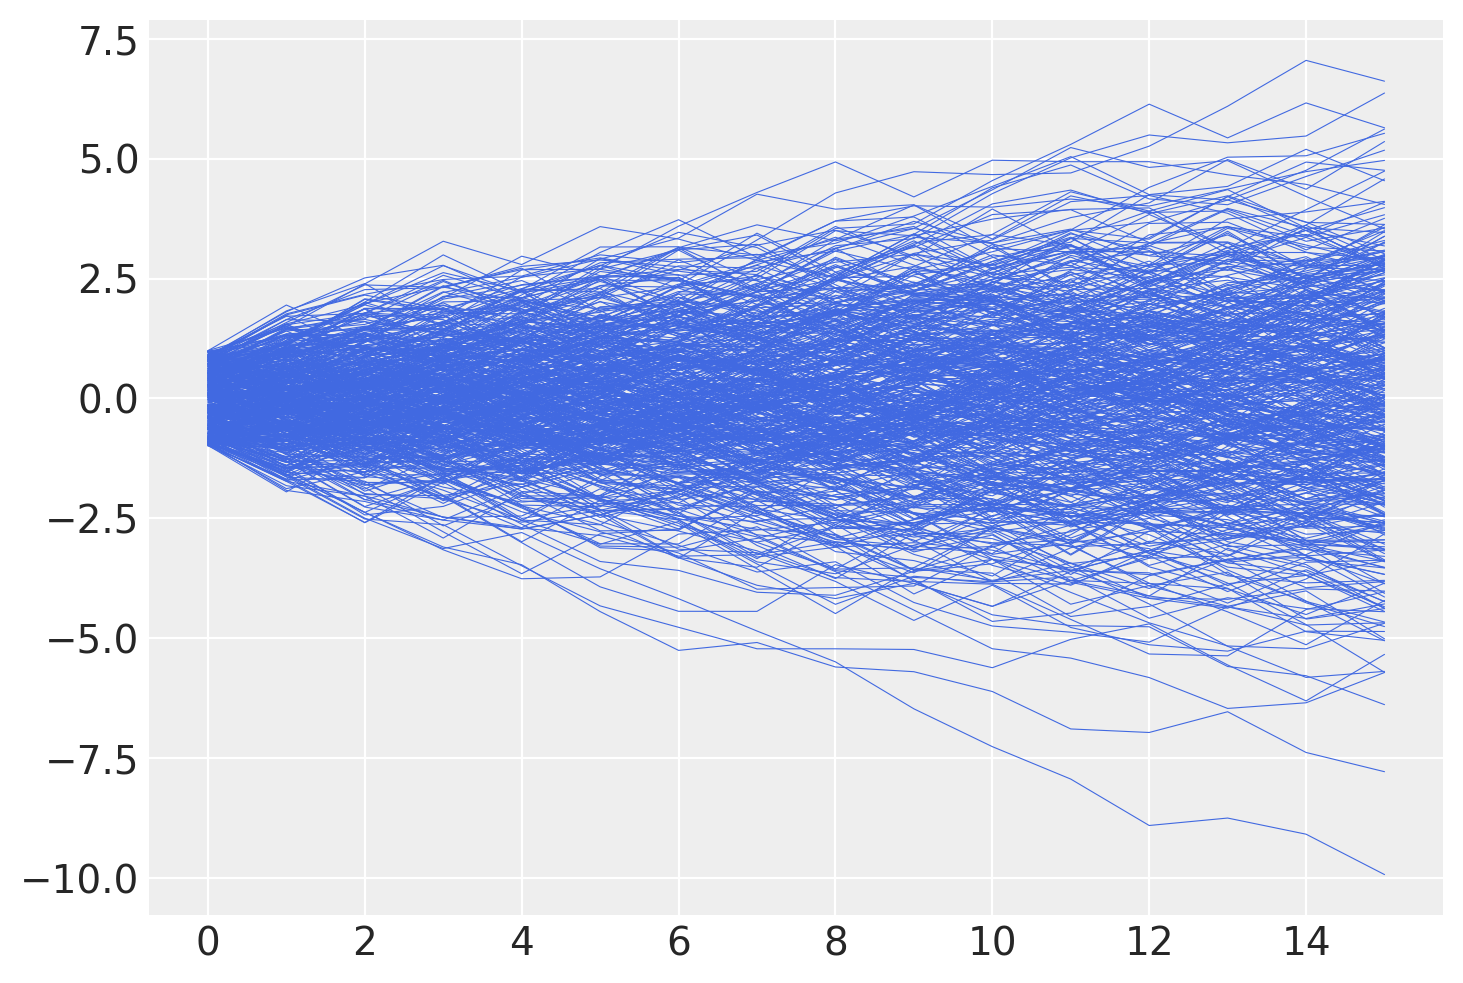

In [7]:
for k in range(500):
    particularWalk = randomwalk(16)
    plt.plot(np.arange(16),particularWalk, color='royalblue', linewidth=0.4)

Per esempio, possiamo predire in maniera accurata la proporzione di persone che si sono spostate in avanti oppure all'indietro. Oppure, possiamo predire accuratamente la proporzione di persone che si troveranno ad una certa distanza dalla linea di partenza (es., a 1.5 m dall'origine). Queste predizioni sono possibili perché tali distanze si distribuiscono secondo la legge Normale. 

Questa simulazione mostra che qualunque processo nel quale viene sommato un certo numero di valori casuali, tutti provenienti dalla medesima distribuzione, converge ad una distribuzione Normale. Non importa quale sia la forma della distribuzione di partenza: essa può essere uniforme, come nell'esempio presente, o di qualunque altro tipo. La forma della distribuzione da cui viene realizzato il campionamento determina la velocità della convergenza alla Normale. In alcuni casi la convergenza è lenta; in altri casi la convergenza è molto rapida (come nell'esempio presente).

Da un punto di vista formale, diciamo che una variabile casuale continua $Y$ ha una distribuzione Normale se la sua densità è

$$
f(y; \mu, \sigma) = {1 \over {\sigma\sqrt{2\pi} }} \exp \left\{-\frac{(y -  \mu)^2}{2 \sigma^2} \right\},
$$ (eq-normal-formula)

dove $\mu \in \mathbb{R}$ e $\sigma > 0$ sono i parametri della distribuzione.

La densità normale è unimodale e simmetrica con una caratteristica forma a campana e con il punto di massima densità in corrispondenza di $\mu$.

Il significato dei parametri $\mu$ e $\sigma$ che appaiono nell'eq. {eq}`eq-normal-formula` viene chiarito dalla dimostrazione che

$$
\mathbb{E}(Y) = \mu, \qquad \mathbb{V}(Y) = \sigma^2.
$$

La rappresentazione grafica di quattro densità Normali con medie -1, -0.5, 0, 1 e con deviazioni standard 0.25, 0.5, 1 e 2 è fornita nella figura seguente.

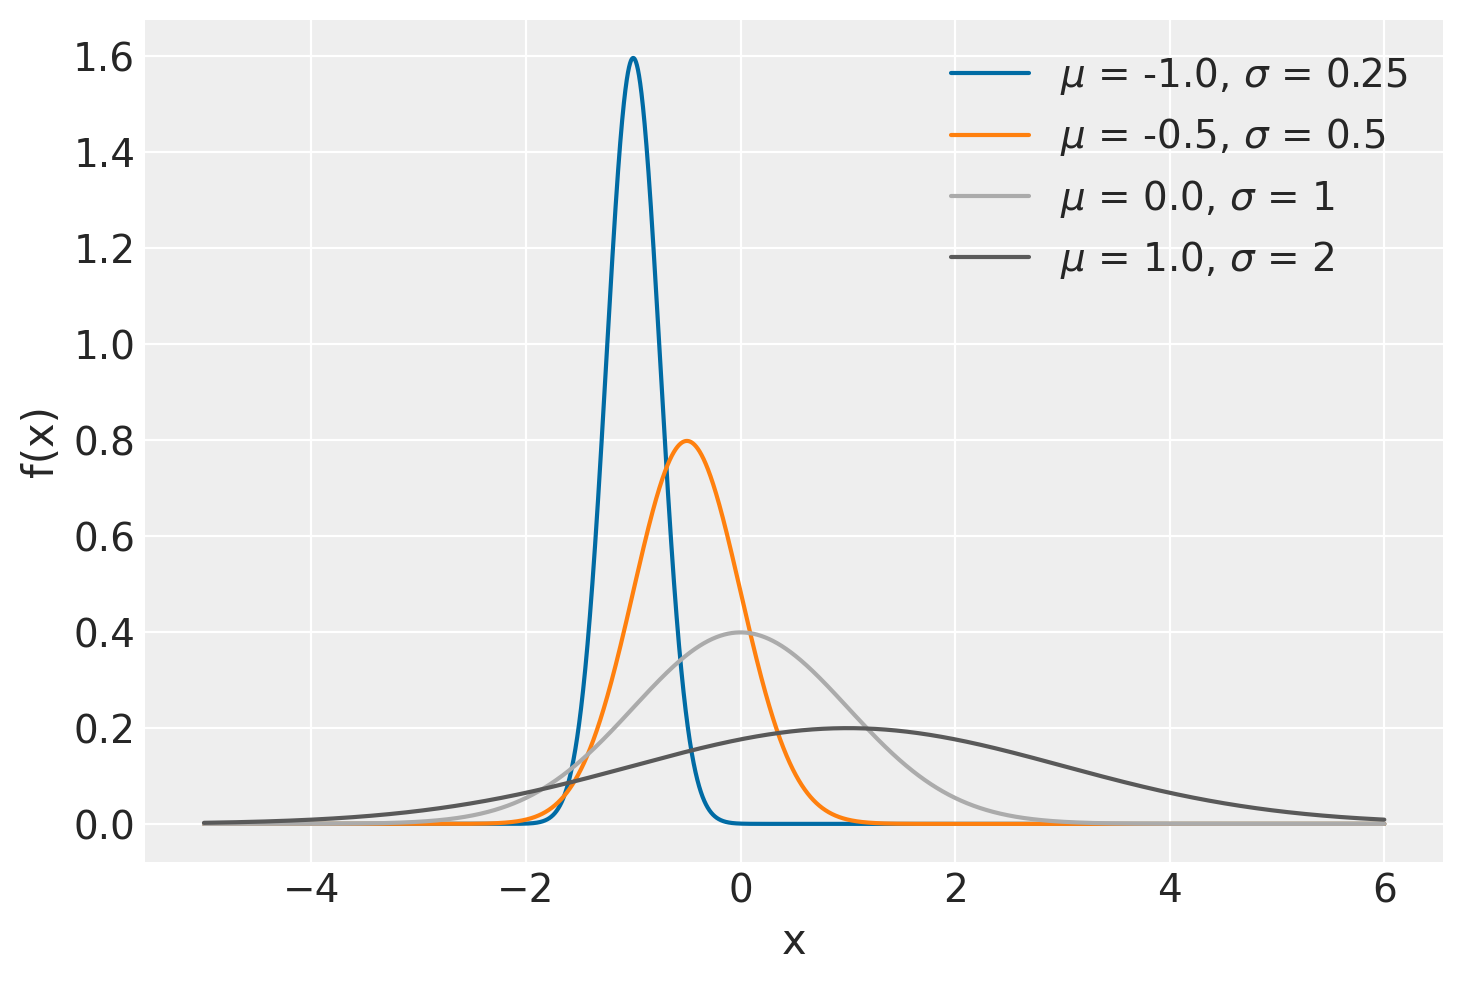

In [13]:
x = np.arange(-5, 6, 0.001)

mus = [-1., -0.5, 0., 1.]
sigmas = [0.25, 0.5, 1, 2]
for mu, sigma in zip(mus, sigmas):
    pdf = st.norm.pdf(x, mu, sigma)
    plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}'.format(mu, sigma))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc=1)
plt.show()

### Concentrazione

È istruttivo osservare il grado di concentrazione della distribuzione Normale attorno alla media:

$$
\begin{align}
P(\mu - \sigma < Y < \mu + \sigma) &= P (-1 < Z < 1) \simeq 0.683, \notag\\
P(\mu - 2\sigma < Y < \mu + 2\sigma) &= P (-2 < Z < 2) \simeq 0.956, \notag\\
P(\mu - 3\sigma < Y < \mu + 3\sigma) &= P (-3 < Z < 3) \simeq 0.997. \notag
\end{align}
$$

Si noti come un dato la cui distanza dalla media è superiore a 3 volte la deviazione standard presenti un carattere di eccezionalità perché meno del 0.3% dei dati della distribuzione Normale presentano questa caratteristica.

Per indicare la distribuzione Normale si usa la notazione $\mathcal{N}(\mu, \sigma)$.

### Funzione di ripartizione

Il valore della funzione di ripartizione di $Y$ nel punto $y$ è l'area sottesa alla curva di densità $f(y)$ nella semiretta $(-\infty, y]$. Non esiste alcuna funzione elementare per la funzione di ripartizione

$$
F(y) = \int_{-\infty}^y {1 \over {\sigma\sqrt{2\pi} }} \exp \left\{-\frac{(y - \mu)^2}{2\sigma^2} \right\} dy, 
$$ (eq-gaussian-rip-formula)

pertanto le probabilità $P(Y < y)$ vengono calcolate mediante integrazione numerica approssimata. I valori della funzione di ripartizione di una variabile casuale Normale sono dunque forniti da un software.

Esaminiamo le funzioni fornite da `scipy` per la densità Normale. Il metodo `.norm.rvs()` produce un valore casuale estratto dalla distribuzione Normale specificata:

In [18]:
st.norm.rvs(loc=100, scale=15)

114.86669079869148

Per esempio, estraiamo 10 valori casuali dalla $\mathcal{N}(100, 15)$:

In [24]:
qi = st.norm.rvs(loc=100, scale=15, size=10)
print(*qi)

98.05407475823279 82.5830834264815 90.64890499459719 99.16647229069902 94.56553000950632 89.79919174354521 93.7530491018825 108.48300249865386 87.77797234536348 96.49635926343872


Per trovare la probabilità che un'osservazione estratta a caso dalla $\mathcal{N}(100, 15)$ abbia un valore minore o uguale a, diciamo, 115, troviamo il valore della funzione di ripartizione (o funzione cumulativa di densità) nel punto 115.

In [26]:
st.norm.cdf(115, 100, 15)

0.8413447460685429

Per trovare la proporzione di persone nella popolazione che hanno un QI maggiore di 2 deviazioni standard dalla media troviamo l'evento complementare.

In [27]:
1 - st.norm.cdf(130, 100, 15)

0.02275013194817921

In maniera equivalente, possiamo usare la *Survival Function*.

In [28]:
st.norm.sf(130,100,15)

0.022750131948179195

Per trovare il quantile della Normale, usiamo `ppf`. Ad esempio

In [30]:
st.norm.ppf(1-0.022750131948179195, 100, 15)

130.0

### Distribuzione Normale standard

La distribuzione Normale di parametri $\mu = 0$ e $\sigma = 1$ viene detta *distribuzione Normale standard*. La famiglia Normale è l'insieme avente come elementi tutte le distribuzioni Normali con parametri $\mu$ e $\sigma$ diversi. Tutte le distribuzioni Normali si ottengono dalla Normale standard mediante una trasformazione lineare: se $Y \sim \mathcal{N}(\mu_Y, \sigma_Y)$ allora

$$
X = a + b Y \sim \mathcal{N}(\mu_X = a+b \mu_Y, \sigma_X = \left|b\right|\sigma_Y).
$$

L'area sottesa alla curva di densità di $\mathcal{N}(\mu, \sigma)$ nella semiretta $(-\infty, y]$ è uguale all'area sottesa alla densità Normale standard nella semiretta $(-\infty, z]$, in cui $z = (y -\mu_Y )/\sigma_Y$ è il punteggio standard di $Y$. Per la simmetria della distribuzione, l'area sottesa nella semiretta $[1, \infty)$ è uguale all'area sottesa nella semiretta $(-\infty, 1]$ e quest'ultima coincide con $F(-1)$. Analogamente, l'area sottesa nell'intervallo $[y_a, y_b]$, con $y_a < y_b$, è pari a $F(z_b) - F(z_a)$, dove $z_a$ e $z_b$ sono i punteggi standard di $y_a$ e $y_b$.

Si ha anche il problema inverso rispetto a quello del calcolo delle aree: dato un numero $0 \leq p \leq 1$, il problema è quello di determinare un numero $z \in \mathbb{R}$ tale che $P(Z < z) = p$. Il valore $z$ cercato è detto *quantile* di ordine $p$ della Normale standard e può essere trovato mediante un software.

Supponiamo che l'altezza degli individui adulti segua la distribuzione Normale di media $\mu = 1.7$ m e deviazione standard $\sigma = 0.1$ m. Vogliamo sapere la proporzione di individui adulti con un'altezza compresa tra $1.7$ e $1.8$ m.

Il problema ci chiede di trovare l'area sottesa alla distribuzione $\mathcal{N}(\mu = 1.7, \sigma = 0.1)$ nell'intervallo $[1.7, 1.8]$:

In [32]:
st.norm.cdf(1.8, 1.7, .1) - st.norm.cdf(1.7, 1.7, .1)

0.34134474606854315

In maniera equivalente, possiamo standardizzare i valori che delimitano l'intervallo considerato e utilizzare la funzione di ripartizione della normale standardizzata. I limiti inferiore e superiore dell'intervallo sono

$$
z_{\text{inf}} = \frac{1.7 - 1.7}{0.1} = 0, \quad z_{\text{sup}} = \frac{1.8 - 1.7}{0.1} = 1.0,
$$

quindi otteniamo

In [33]:
st.norm.cdf(1.0, 0, 1) - st.norm.cdf(0, 0, 1)

0.3413447460685429

Il modo più semplice per risolvere questo problema resta comunque quello di rendersi conto che la probabilità richiesta non è altro che la metà dell'area sottesa dalle distribuzioni Normali nell'intervallo $[\mu - \sigma, \mu + \sigma]$, ovvero $0.683/2$.

## Teorema del limite centrale

Laplace dimostrò il teorema del limite centrale (TLC) nel 1812. Il TLC dice che se prendiamo una sequenza di variabili casuali indipendenti e le sommiamo, tale somma tende a distribuirsi come una Normale. Inoltre, il TLC specifica, sulla base dei valori attesi e delle varianze delle v.c. che vengono sommate, quali sono i parametri della distribuzione Normale così ottenuta.

```{admonition} Teorema
Si supponga che $Y = Y_1, \dots, Y_i, \ldots, Y_n$ sia una sequenza di v.a. i.i.d. con $\mathbb{E}(Y_i) = \mu$ e $\mbox{SD}(Y_i) = \sigma$. Si definisca una nuova v.c. come:

$$
Z = \frac{1}{n} \sum_{i=1}^n Y_i.
$$

Con $n \rightarrow \infty$, $Z$ tenderà ad una Normale con lo stesso valore atteso di $Y_i$ e una deviazione standard che sarà più piccola della deviazione standard originaria di un fattore pari a $\frac{1}{\sqrt{n}}$:

$$
p_Z(z) \rightarrow \mathcal{N}\left(z \ \Bigg| \ \mu, \, \frac{1}{\sqrt{n}} \cdot \sigma \right).
$$
```

Il TLC può essere generalizzato a variabili che non hanno la stessa distribuzione purché siano indipendenti e abbiano aspettative e varianze finite. Molti fenomeni naturali, come l'altezza dell'uomo adulto di entrambi i generi, sono il risultato di una serie di effetti additivi relativamente piccoli, la cui combinazione porta alla normalità, indipendentemente da come gli effetti additivi sono distribuiti. Questo è il motivo per cui la distribuzione normale forniscre una buona rappresentazione della distribuzione di molti fenomeni naturali.

## Distribuzione Chi-quadrato

Dalla Normale deriva la distribuzione $\chi^2$. La distribuzione $\chi^2_{~k}$ con $k$ gradi di libertà descrive la variabile casuale

$$
Z_1^2 + Z_2^2 + \dots + Z_k^2,
$$

dove $Z_1, Z_2, \dots, Z_k$ sono variabili casuali i.i.d. che seguono la distribuzione Normale standard $\mathcal{N}(0, 1)$. La variabile casuale chi-quadrato dipende dal parametro intero positivo $\nu = k$ che ne identifica il numero di gradi di libertà. La densità di probabilità di $\chi^2_{~\nu}$ è

$$
f(x) = C_{\nu} x^{\nu/2-1} \exp (-x/2), \qquad \text{se } x > 0,
$$

dove $C_{\nu}$ è una costante positiva.

La figura seguente mostra alcune distribuzioni Chi-quadrato variando il parametro $\nu$.

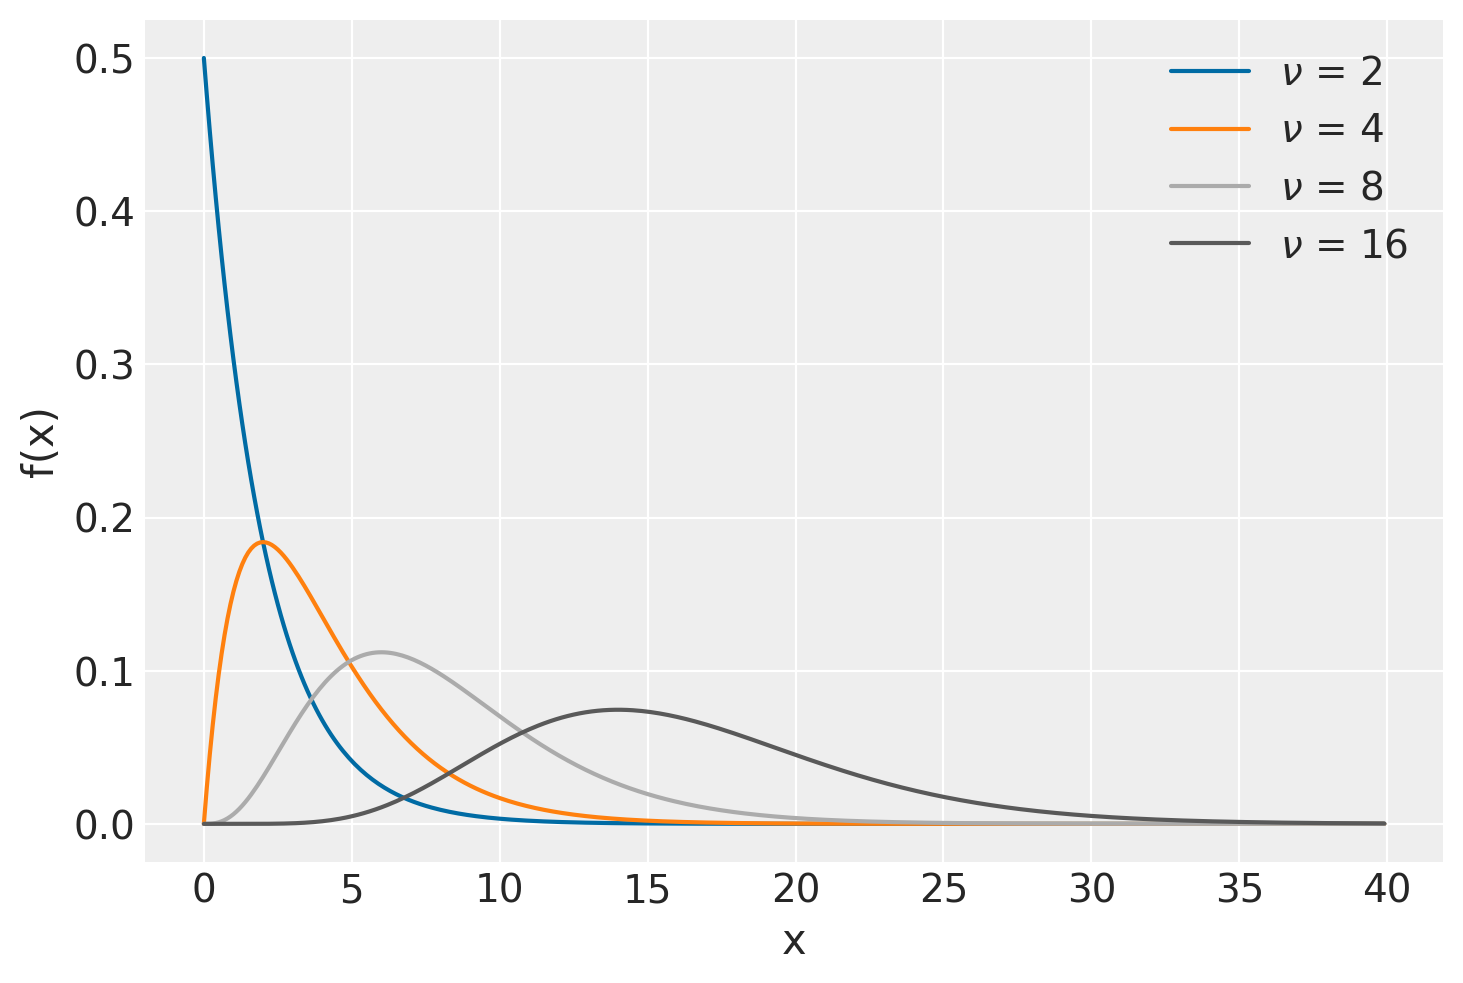

In [35]:
x = np.arange(0, 40, 0.1)

nus = [2, 4, 8, 16]
for nu in nus:
    pdf = st.chi2.pdf(x, nu)
    plt.plot(x, pdf, label=r'$\nu$ = {}'.format(nu))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc=1)
plt.show()

### Proprietà

-   La distribuzione di densità $\chi^2_{~\nu}$ è asimmetrica.
-   Il valore atteso di una variabile $\chi^2_{~\nu}$ è uguale a $\nu$.
-   La varianza di una variabile $\chi^2_{~\nu}$ è uguale a $2\nu$.
-   Per $k \rightarrow \infty$, la $\chi^2_{~\nu} \rightarrow \mathcal{N}$.
-   Se $X$ e $Y$ sono due variabili casuali chi-quadrato indipendenti con $\nu_1$ e $\nu_2$ gradi di libertà, ne segue che $X + Y \sim \chi^2_m$, con $m = \nu_1 + \nu_2$. Tale principio si estende a qualunque numero finito di variabili casuali chi-quadrato indipendenti.

## Distribuzione $t$ di Student

Dalle distribuzioni Normale e Chi-quadrato deriva un'altra distribuzione molto nota, la $t$ di Student. Se $Z \sim \mathcal{N}$ e $W \sim \chi^2_{~\nu}$ sono due variabili casuali indipendenti, allora il rapporto

$$
T = \frac{Z}{\Big( \frac{W}{\nu}\Big)^{\frac{1}{2}}}
$$ (eq-student-t-distr)

definisce la distribuzione $t$ di Student con $\nu$ gradi di libertà. Si usa scrivere $T \sim t_{\nu}$. L'andamento della distribuzione $t$ di Student è simile a quello della distribuzione Normale, ma ha una dispersione maggiore (ha le code più pesanti di una Normale, ovvero ha una varianza maggiore di 1).

La seguente mostra alcune distribuzioni $t$ di Student variando il parametro $\nu$.

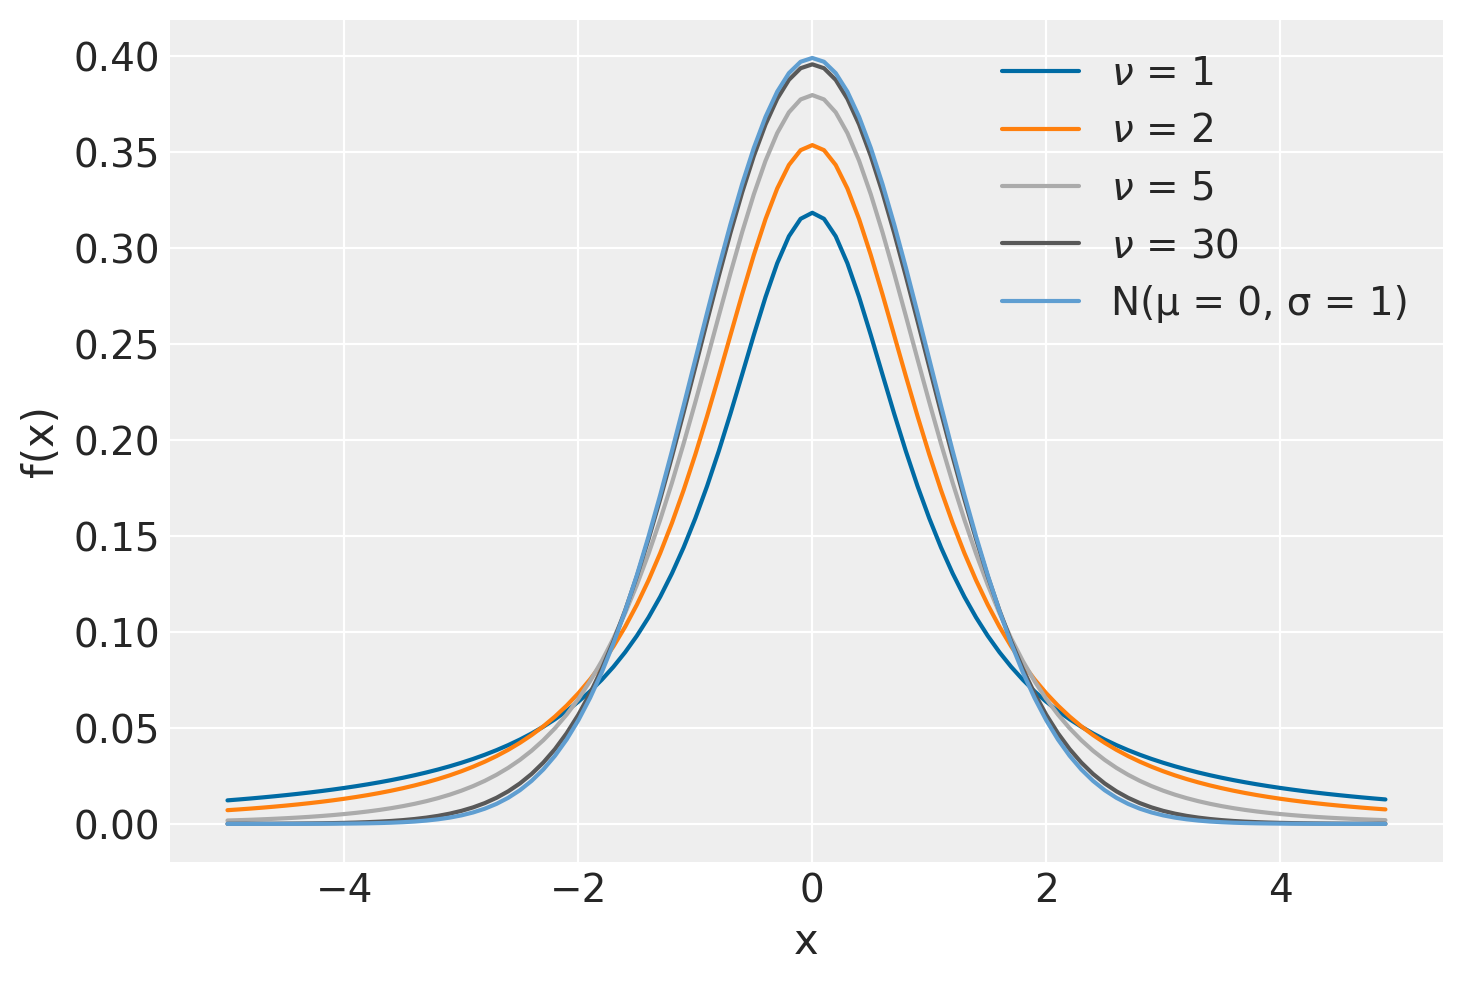

In [39]:
x = np.arange(-5, 5, 0.1)

nus = [1, 2, 5, 30]
for nu in nus:
    pdf = st.t.pdf(x, nu)
    plt.plot(x, pdf, label=r'$\nu$ = {}'.format(nu))
plt.plot(x, st.norm.pdf(x, 0, 1), label='N(μ = 0, σ = 1)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc=1)
plt.show()

### Proprietà

La variabile casuale $t$ di Student soddisfa le seguenti proprietà:

1.  Per $\nu \rightarrow \infty$, $t_{\nu}$ tende alla normale standard $\mathcal{N}(0, 1)$.
2.  La densità della $t_{\nu}$ è una funzione simmetrica con valore atteso nullo.
3.  Per $\nu > 2$, la varianza della $t_{\nu}$ vale $\nu/(\nu - 2)$; pertanto è sempre maggiore di 1 e tende a 1 per $\nu \rightarrow \infty$.

## Funzione beta di Eulero

La funzione beta di Eulero è una funzione matematica, *non* una densità di probabilità. La menzioniamo qui perché viene utilizzata nella distribuzione Beta. La funzione beta di Eulero si può scrivere in molti modi diversi; per i nostri scopi la presentiamo così:

$$
B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}\,,
$$ (eq-eulero-function)

dove $\Gamma(x)$ è la funzione Gamma, ovvero il fattoriale discendente, cioè

$$
(x-1)(x-2)\ldots (x-n+1)\notag\,.
$$

Per esempio, posti $\alpha = 3$ e $\beta = 9$, la funzione beta assume il valore

In [40]:
import scipy.special as sc

alpha = 3
beta = 9
sc.beta(alpha, beta)

0.00202020202020202

Lo stesso risultato si ottiene con

In [134]:
((2) * (8 * 7 * 6 * 5 * 4 * 3 * 2)) / (11 * 10 * 9 * 8 * 7 * 6 * 5 * 4 * 3 * 2)

0.00202020202020202

ovvero

In [135]:
alpha = 3
beta = 9
sc.gamma(alpha) * sc.gamma(beta) / sc.gamma(alpha + beta)

0.00202020202020202

## Distribuzione Beta

La distribuzione Beta è una distribuzione usata per modellare percentuali e proporzioni in quanto è definita sull'intervallo $(0; 1)$ -- ovvero, non include i valori 0 o 1.

```{admonition} Definizione
Sia $\pi$ una variabile casuale che può assumere qualsiasi valore compreso tra 0 e 1, cioè $\pi \in [0, 1]$. Diremo che $\pi$ segue la distribuzione Beta di parametri $\alpha$ e $\beta$, $\pi \sim \text{Beta}(\alpha, \beta)$, se la sua densità è

$$
\begin{align}
\text{Beta}(\pi \mid \alpha, \beta) &= \frac{1}{B(\alpha, \beta)}\pi^{\alpha-1} (1-\pi)^{\beta-1}\notag\\ 
&=  \frac{\Gamma(\alpha+ \beta)}{\Gamma(\alpha)\Gamma(\beta)}\pi^{\alpha-1} (1-\pi)^{\beta-1} \quad \text{per } \pi \in [0, 1]\,,
\end{align}
$$ (eq-beta-distr-formula)

laddove $B(\alpha, \beta)$ è la funzione beta di Eulero.
```

I termini $\alpha$ e $\beta$ sono i parametri della distribuzione Beta e devono essere entrambi positivi. Tali parametri possono essere interpretati come l'espressione delle nostre credenze a priori relative ad una sequenza di prove Bernoulliane. Il parametro $\alpha$ rappresenta il numero di "successi" e il parametro $\beta$ il numero di "insuccessi":

$$
\frac{\text{Numero di successi}}{\text{Numero di successi} + \text{Numero di insuccessi}} = \frac{\alpha}{\alpha + \beta}\notag\,.
$$

Il rapporto $\frac{1}{B(\alpha, \beta)} = \frac{\Gamma(\alpha+b)}{\Gamma(\alpha)\Gamma(\beta)}$ è una costante di normalizzazione:

$$
\int_0^1 \pi^{\alpha-1} (1-\pi)^{\beta-1} = \frac{\Gamma(\alpha+b)}{\Gamma(\alpha)\Gamma(\beta)}\,.
$$

Ad esempio, con $\alpha = 3$ e $\beta = 9$ abbiamo

In [136]:
from scipy.integrate import quad

def integrand(p, a, b):
    return p**(a-1) * (1-p)**(b-1)

a = 3
b = 9
result, error = quad(integrand, 0, 1, args=(a, b))
print(result)

0.00202020202020202


ovvero

In [137]:
import math

a = 3
b = 9

result = math.gamma(a) * math.gamma(b) / math.gamma(a + b)
print(result)

0.00202020202020202


ovvero

In [138]:
sc.beta(a, b)

0.00202020202020202

Il valore atteso, la moda e la varianza di una distribuzione Beta sono dati dalle seguenti equazioni:

$$
\mathbb{E}(\pi) = \frac{\alpha}{\alpha+\beta}\,,
$$ (eq-beta-mean)

$$
Mo(\pi) = \frac{\alpha-1}{\alpha+\beta-2}\,,
$$ (eq-beta-mode)

$$
\mathbb{V}(\pi) = \frac{\alpha \beta}{(\alpha+\beta)^2 (\alpha+\beta+1)}\,.
$$ (eq-beta-var)

Al variare di $\alpha$ e $\beta$ si ottengono molte distribuzioni di forma diversa; un'illustrazione è fornita dalla seguente [GIF animata](https://en.wikipedia.org/wiki/File:PDF_of_the_Beta_distribution.gif).

La figura seguente mostra la distribuzione $Beta(x \mid \alpha, \beta)$ per $\alpha$ = 0.5, 5.0, 1.0, 2.0, 2.0 e $\beta$ = 5, 1.0, 3.0, 2.0, 5.0.

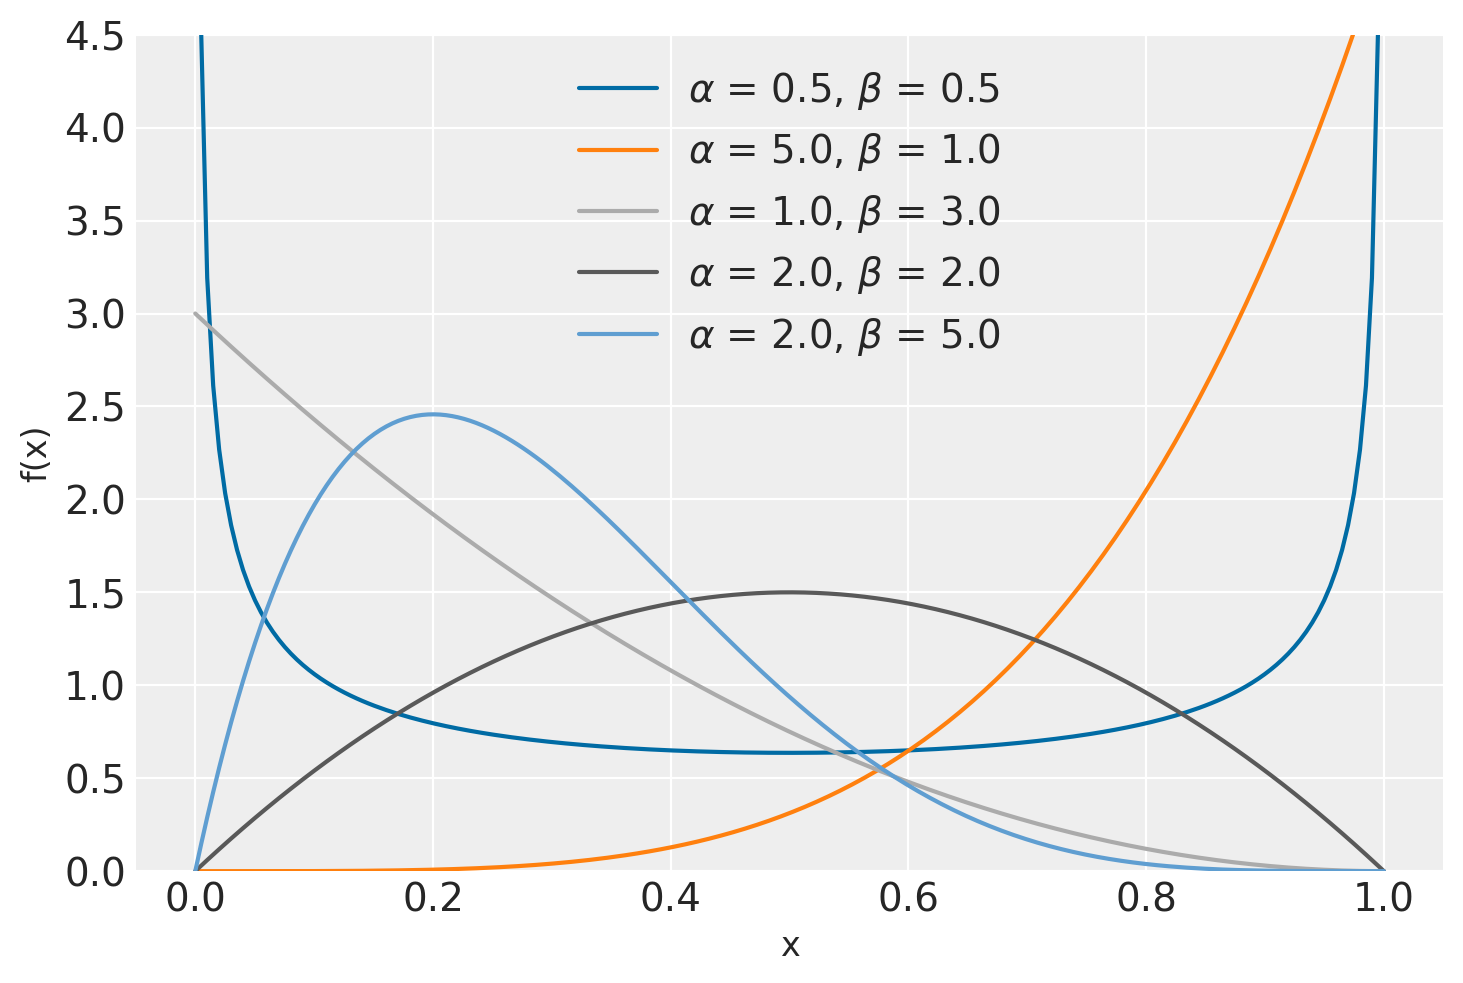

In [41]:
x = np.linspace(0, 1, 200)
alphas = [.5, 5., 1., 2., 2.]
betas = [.5, 1., 3., 2., 5.]
for a, b in zip(alphas, betas):
    pdf = st.beta.pdf(x, a, b)
    plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.ylim(0, 4.5)
plt.legend(loc=9)
plt.show()

La funzione `beta_mean_mode_variance()` ci restituisce la media, moda e varianza della distribuzione Beta.

In [140]:
def beta_mean_mode_variance(alpha, beta):
    mean = alpha / (alpha + beta)
    mode = (alpha - 1) / (alpha + beta - 2)
    variance = alpha * beta / ((alpha + beta)**2 * (alpha + beta + 1))
    return mean, mode, variance

Per esempio

In [141]:
alpha = 3
beta = 9
mean, mode, variance = beta_mean_mode_variance(alpha, beta)
print(f'Mean: {mean}, Mode: {mode}, Variance: {variance}')

Mean: 0.25, Mode: 0.2, Variance: 0.014423076923076924


```{warning} 
Attenzione alle parole: in questo contesto, il termine "beta" viene utilizzato con tre significati diversi:

-   la distribuzione di densità Beta,
-   la funzione matematica beta,
-   il parametro $\beta$.
```

# Distribuzione di Cauchy

La distribuzione di Cauchy è un caso speciale della distribuzione di $t$ di Student con 1 grado di libertà. È definita da una densità di probabilità che corrisponde alla seguente funzione, dipendente da due parametri $\alpha$ e $\beta$,

$$
f(x \mid \alpha, \beta) = \frac{1}{\pi \beta \left[1 + \left( \frac{x - \alpha}{\beta} \right)^2\right]}.
$$ (eq-cauchy-formula)

Il grafico mostra alcune distribuzioni di Cauchy con $\alpha$ = 0., 0., 0., -2.0 e $\beta$ = .5, 1., 2., 1.0.

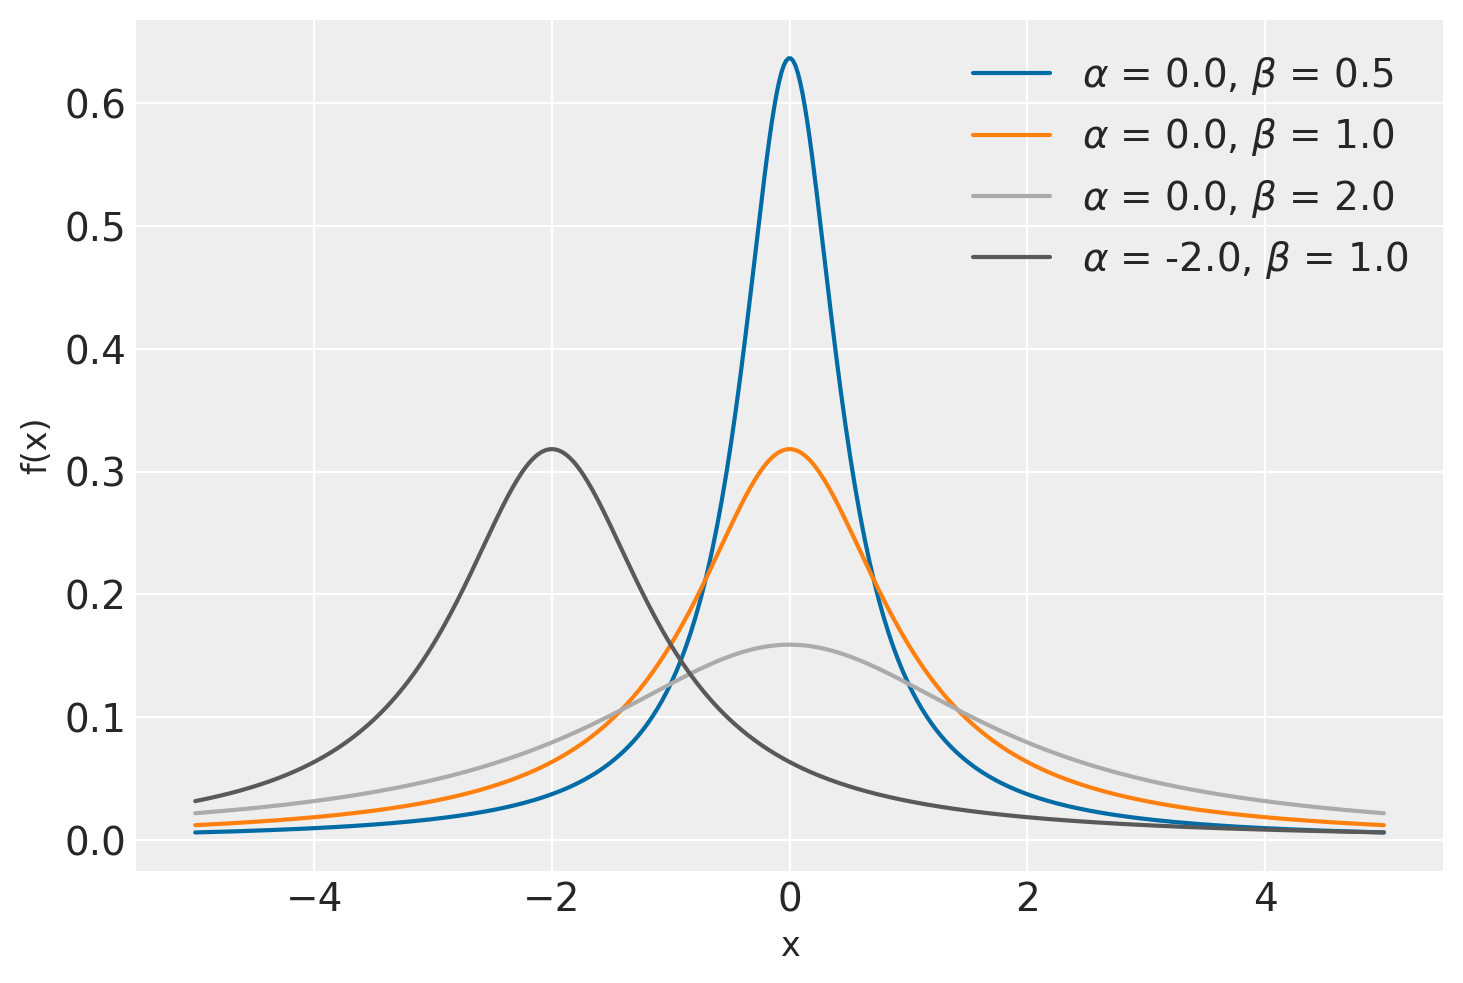

In [42]:
x = np.linspace(-5, 5, 500)
alphas = [0., 0., 0., -2.]
betas = [.5, 1., 2., 1.]
for a, b in zip(alphas, betas):
    pdf = st.cauchy.pdf(x, loc=a, scale=b)
    plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

## Distribuzione log-normale

Sia $y$ una variabile casuale avente distribuzione normale con media $\mu$ e varianza $\sigma^2$. Definiamo poi una nuova variabile casuale $x$ attraverso la relazione

$$
x = e^y \quad \Longleftrightarrow \quad y = \log x.
$$ 

Il dominio di definizione della $x$ è il semiasse $x > 0$ e la densità di probabilità $f(x)$ è data da

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \frac{1}{x} \exp \left\{-\frac{(\log x -  \mu)^2}{2 \sigma^2} \right\}.
$$ (eq-lognormal-formula)

Questa funzione di densità è chiamata log-normale.

Il valore atteso e la varianza di una distribuzione log-normale sono dati dalle seguenti equazioni:

$$
\mathbb{E}(x) = \exp \left\{\mu + \frac{\sigma^2}{2} \right\}.
$$

$$
\mathbb{V}(x) = \exp \left\{2 \mu + \sigma^2 \right\} \left(\exp \left\{\sigma^2 \right\}  -1\right).
$$

Si può dimostrare che il prodotto di variabili casuali log-normali ed indipendenti segue una distribuzione log-normale.

La figura mostra tre distribuzioni log-normali con $\mu$ = 0.0 e $\sigma$ = .25, .5, 1.0.

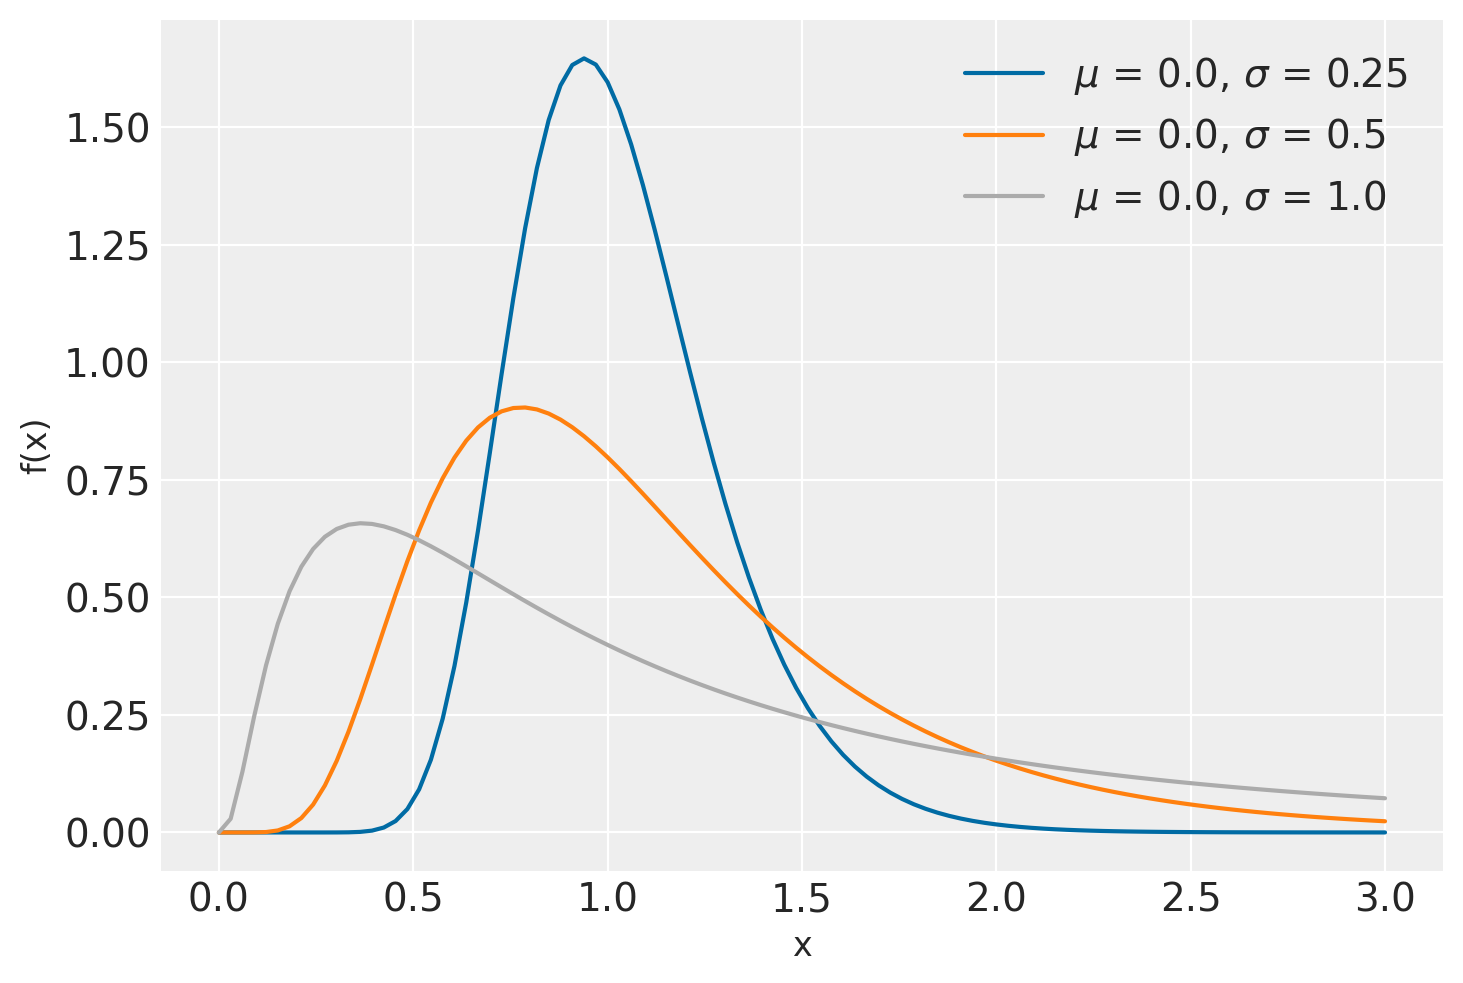

In [44]:
x = np.linspace(0, 3, 100)
mus = [0., 0., 0.]
sigmas = [.25, .5, 1.]
for mu, sigma in zip(mus, sigmas):
    pdf = st.lognorm.pdf(x, sigma, scale=np.exp(mu))
    plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}'.format(mu, sigma))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

## Commenti e considerazioni finali 

In questa dispensa le densità continue che useremo più spesso sono la distribuzione Normale e la distribuzione Beta. Faremo un uso limitato della distribuzione $t$ di Student e della distribuzione di Cauchy. Le altre distribuzioni qui descritte sono stato presentate per completezza.